<a href="https://colab.research.google.com/github/Ser9ibus/BaumVKR2/blob/main/PCA_tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

In [4]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
#print(f'X is {X}')
#print(f'Y is {Y}')

In [5]:
pca = decomposition.PCA()
pca.fit(X)

PCA()

In [6]:
# Вычислим дисперсии
explained_variance = pca.explained_variance_
explained_variance

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [7]:
# Критерий информативности
# Вычислим относительную долю суммарной дисперсии, 
# обусловленную одной, двумя, тремя и четырьмя главными компонентами
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [8]:
# Сингулярные собственные значения
pca.singular_values_

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

In [16]:
# Стандартизируем данные и пересчитаем аналогично
from sklearn.preprocessing import StandardScaler
X_st = iris.data
X_st = StandardScaler().fit_transform(X_st)
pca_st = decomposition.PCA()
pca_st.fit(X_st)
explained_variance_st = pca_st.explained_variance_
print(f'explained_variance_st: {explained_variance_st}')
explained_variance_ratio_st = pca_st.explained_variance_ratio_
print(f'explained_variance_ratio_st: {explained_variance_ratio_st}')

explained_variance_st: [2.93808505 0.9201649  0.14774182 0.02085386]
explained_variance_ratio_st: [0.72962445 0.22850762 0.03668922 0.00517871]


In [17]:
# Сравним результаты, полученные на исходных X и если стандартизировать данные методом StandardScaler(X)
print(f'explained_variance: {explained_variance}')
print(f'explained_variance_st: {explained_variance_st}')
print(f'explained_variance_ratio: {explained_variance_ratio}')
print(f'explained_variance_ratio_st: {explained_variance_ratio_st}')

explained_variance: [4.22824171 0.24267075 0.0782095  0.02383509]
explained_variance_st: [2.93808505 0.9201649  0.14774182 0.02085386]
explained_variance_ratio: [0.92461872 0.05306648 0.01710261 0.00521218]
explained_variance_ratio_st: [0.72962445 0.22850762 0.03668922 0.00517871]


In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [34]:
# Понижаем размерность до 2х главных компонент
pca2 = decomposition.PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)
# Кластеризуемм при помощи алгоритма KMeans на три кластера (по количеству видов ириса)
k_means = KMeans(n_clusters=3).fit(X_pca2)
# Кластеризуемм при помощи алгоритма AgglomerativeClustering на три кластера (по количеству видов ириса)
AG_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_pca2)

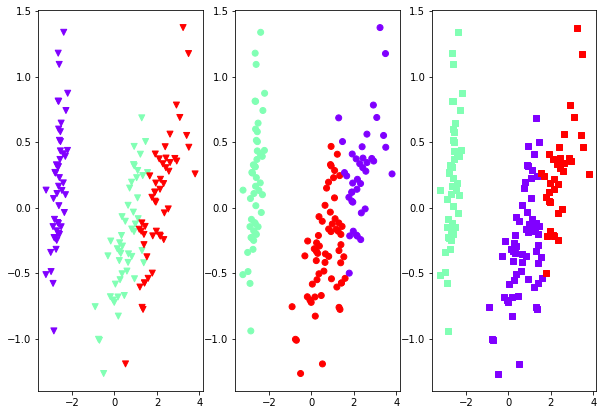

In [40]:
# Визуализация
fig = plt.figure(figsize=(10,7))
# исходные кластеры
ax = fig.add_subplot(131)
plt.scatter(X_pca2[:,0],X_pca2[:,1], c = Y, marker = 'v', cmap= 'rainbow')
# кластеризация KMeans
ax = fig.add_subplot(132)
plt.scatter(X_pca2[:,0],X_pca2[:,1], c = k_means.labels_, marker = 'o',cmap= 'rainbow')
# кластеризация AgglomerativeClustering
ax = fig.add_subplot(133)
plt.scatter(X_pca2[:,0],X_pca2[:,1], c = AG_clustering.labels_, marker = 's',cmap= 'rainbow')

In [47]:
# TSNE import
from sklearn.manifold import TSNE
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
#дописать применение ТСНЕ к ирисам
X_tsne = TSNE(n_components=2, init='random').fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


t-SNE perplexity=5: 9.6 sec


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


t-SNE perplexity=15: 11 sec


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


t-SNE perplexity=30: 15 sec


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


t-SNE perplexity=50: 19 sec


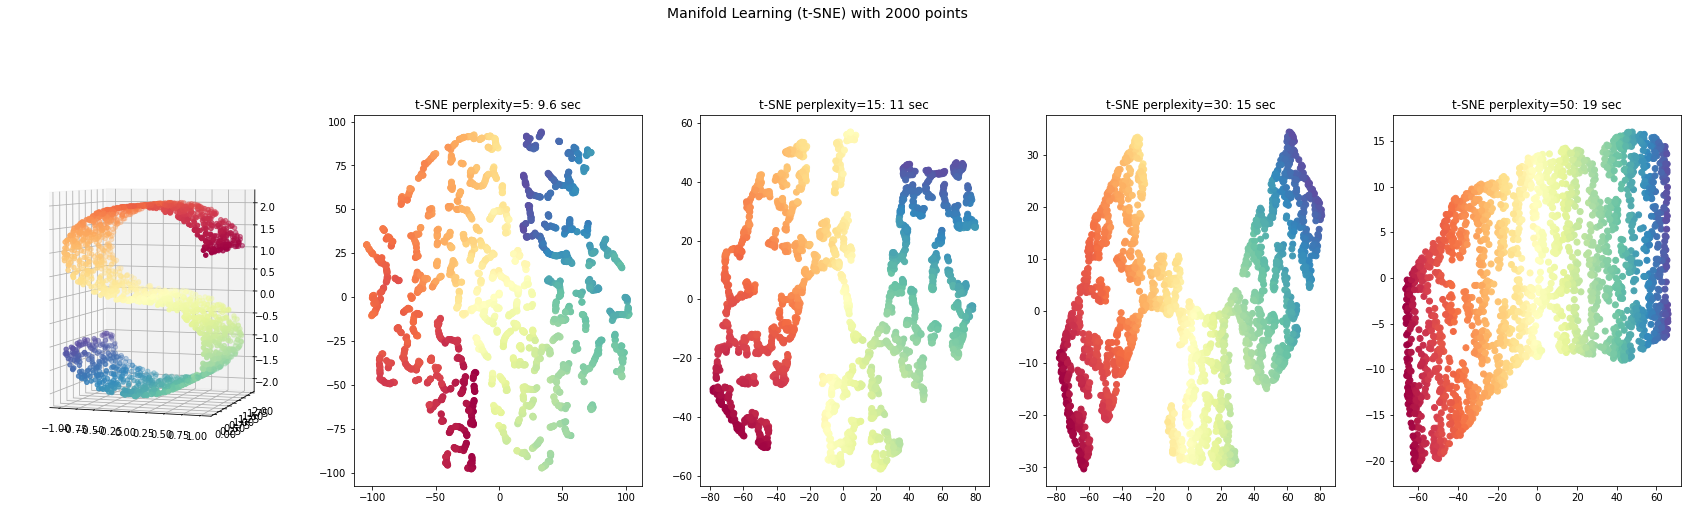

In [51]:
# пример
Axes3D
n_points = 2000
X, color = datasets.make_s_curve(n_points, random_state=10)
n_components = 2
# Create figure
fig = plt.figure(figsize=(30,15))
fig.suptitle('Manifold Learning (t-SNE) with %i points' % (2000,),fontsize=14)
# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2], c = color, cmap=plt.cm.Spectral)
ax.view_init(4,-72)

# Setup manifold methods

methods = OrderedDict()
methods['t-SNE perplexity=5'] = manifold.TSNE(n_components=n_components, init='pca', random_state=0, perplexity=5)
methods['t-SNE perplexity=15'] = manifold.TSNE(n_components=n_components, init='pca', random_state=0, perplexity=15)
methods['t-SNE perplexity=30'] = manifold.TSNE(n_components=n_components, init='pca', random_state=0, perplexity=30)
methods['t-SNE perplexity=50'] = manifold.TSNE(n_components=n_components, init='pca', random_state=0, perplexity=50)

# Plot results
for i, (label, method) in enumerate(methods.items()):
  t0 = time()
  Y = method.fit_transform(X)
  t1 = time()
  print ("%s: %.2g sec" % (label, t1-t0))
  ax = fig.add_subplot(2,5,2+i+(i>3))
  ax.scatter(Y[:,0],Y[:,1], c=color, cmap = plt.cm.Spectral)
  ax.set_title("%s: %.2g sec" % (label, t1-t0))
  ax.axis('tight')

plt.show()